# Monte Carlo Simulation for N-Queens Problem

The N-Queens problem is a classic chess puzzle where we need to place N queens on an N×N chessboard such that no two queens threaten each other. A Monte Carlo simulation can help us estimate the complexity of solving this problem using backtracking.

# What is Monte Carlo Method?

Monte Carlo methods use random sampling to obtain numerical results. In this case:

- Randomly explore paths in the state space tree
- Count nodes visited and promising positions
- Estimate total complexity through multiple trials

We will need some libraries

- random for random selection and generation.
- time to calculate the actual execution time.
- stats for calculation STD and mean ( Not Necessary Nice to have ).
- Numpy , for efficient and fast Numpy array manipulation.

In [24]:
import random
import time
from statistics import mean, stdev
import numpy as np

# Checking Promising Positions

According to the pseudo code provided in the slides, I am using a pruning approach to get an efficient solution for backtracking. 

We need to determine if a queen placement is valid (promising) by checking:

-   No queen in the same column
-   No queen in the diagonals

In [25]:
def promising(i, j, col):
    for k in range(i):
        if (col[k] == j #if a queen is in the same col as current
            or abs(col[k] - j) == abs(k - i)): #if a queen is in same diagonal as current
            return False
    return True

#### 1. Start from root node

#### 2. At each level:

- Count total nodes
- Find promising positions
- Randomly select one promising child


#### 3. Continue until no promising children or board is full

In [26]:
def monte_carlo_estimate(n):

    col = [-1] * n
    total_nodes = 1    # Root node
    promising_nodes = 1  # Root is promising
    m = 1
    mprod = 1
    i = 0
    
    while m != 0 and i != n:
        mprod = mprod * m
        current_level_nodes = mprod * n
        total_nodes += current_level_nodes
        
        # Find promising children at current level
        m = 0
        promising_children = []
        for j in range(n):
            if promising(i, j, col):
                m += 1
                promising_children.append(j)
        
        promising_nodes += m * mprod
        
        if m != 0:
            j = random.choice(promising_children)
            col[i] = j
            i += 1
    
    return total_nodes, promising_nodes

Make n Runs to get a ballpark of what average count looks like for promising nodes and exec time

In [27]:
def run_monte_carlo_simulation(n, num_trials=100):
  
    total_estimates = []
    promising_estimates = []
    start_time = time.time()
    
    for _ in range(num_trials):
        total_est, promising_est = monte_carlo_estimate(n)
        total_estimates.append(total_est)
        promising_estimates.append(promising_est)
    
    execution_time = time.time() - start_time
    
    return mean(promising_estimates), execution_time


Monte Carlo Simulation for 12-Queens Problem

Results for 1000 trials:
Average Promising Nodes: 838,092.04
Execution time: 0.1036 seconds
------------------------------------------------------------

Results for 5000 trials:
Average Promising Nodes: 846,092.82
Execution time: 0.4443 seconds
------------------------------------------------------------

Results for 10000 trials:
Average Promising Nodes: 868,200.78
Execution time: 0.8907 seconds
------------------------------------------------------------


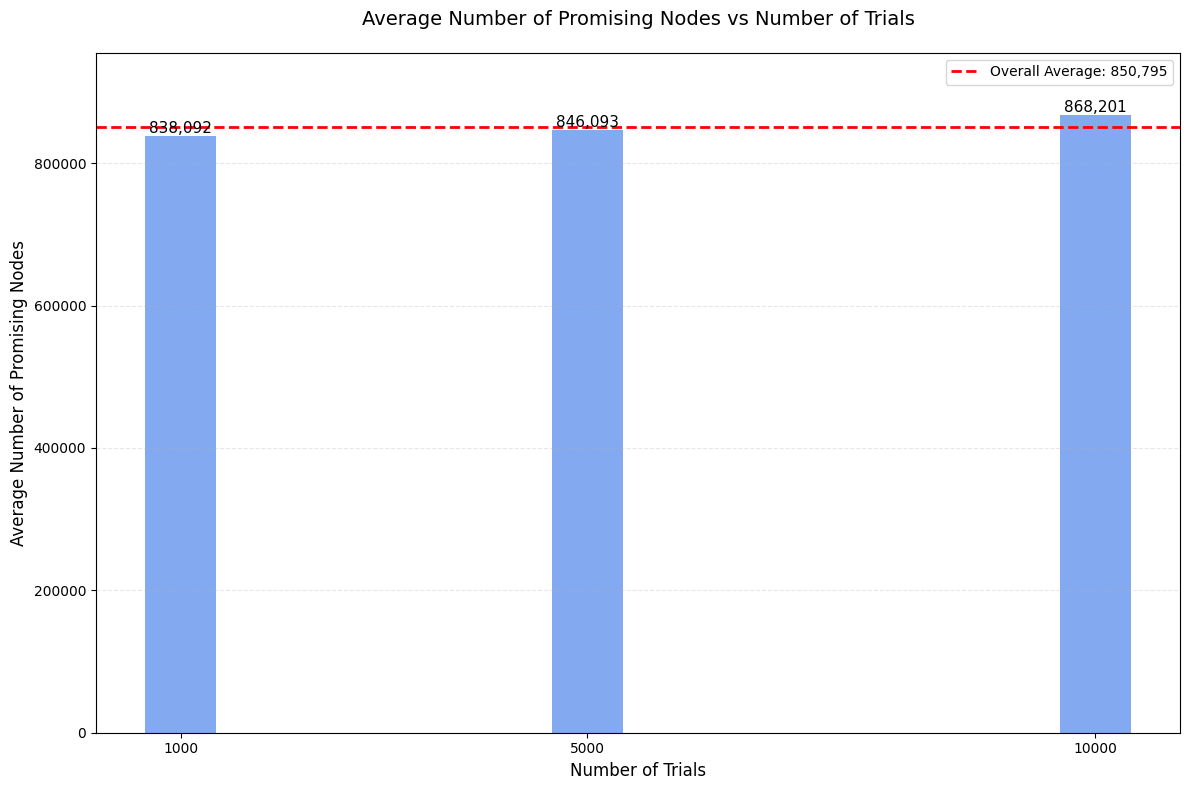

In [28]:
import matplotlib.pyplot as plt


def plot_monte_carlo_results(num_trials, promising_averages):
    overall_average = np.mean(promising_averages)
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(num_trials, promising_averages,
                  width=np.min(num_trials) * 0.7,  
                  color='cornflowerblue',
                  alpha=0.8)
    
    plt.axhline(y=overall_average,
               color='red',
               linestyle='--',
               linewidth=2,
               label=f'Overall Average: {overall_average:,.0f}')
    
    plt.title('Average Number of Promising Nodes vs Number of Trials',
             fontsize=14,
             pad=20)
    plt.xlabel('Number of Trials', fontsize=12)
    plt.ylabel('Average Number of Promising Nodes', fontsize=12)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.,
                height,
                f'{height:,.0f}',
                ha='center',
                va='bottom',
                fontsize=11)
    
    plt.grid(True, axis='y', alpha=0.3, linestyle='--')
    plt.xticks(num_trials)
    plt.ylim(0, max(promising_averages) * 1.1)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    return plt

def main():
    n = 12  # Board size
    num_trials = [1000, 5000, 10000]  # Can be modified to any list of trial sizes
    random.seed(123)
    
    print(f"\nMonte Carlo Simulation for {n}-Queens Problem")
    print("=" * 60)
    
    # Lists to store results
    promising_averages = []
    execution_times = []
    
    # Run simulations for each trial size
    for trials in num_trials:
        avg_promising, exec_time = run_monte_carlo_simulation(n, trials)
        promising_averages.append(avg_promising)
        
        print(f"\nResults for {trials} trials:")
        print(f"Average Promising Nodes: {avg_promising:,.2f}")
        print(f"Execution time: {exec_time:.4f} seconds")
        print("-" * 60)
    
    # Create and show the plot
    plot = plot_monte_carlo_results(num_trials, promising_averages)
    plot.show()

if __name__ == "__main__":
    main()

# Results Analysis

When I run this simulation for n = 12:

my estimates are close to  ~ 8.50 × 10^5  

These are after running for a trial run of 1000, 5000 and 10000 each as seen in the plot


# Conclusion

The Monte Carlo simulation effectively estimates the complexity of the N-Queens problem:

- Provides good approximations of node counts
- Much faster than exhaustive counting
- Helps understand the scale of the problem


Analyzing time complexity for N-Queens problem

Results for n=4:
Average Total Nodes: 61.51
Average Promising Nodes: 17.08
Execution Time: 0.0104 seconds

Results for n=8:
Average Total Nodes: 15,929.06
Average Promising Nodes: 2,092.80
Execution Time: 0.0349 seconds

Results for n=12:
Average Total Nodes: 9,975,755.56
Average Promising Nodes: 847,875.20
Execution Time: 0.0895 seconds

Results for n=14:
Average Total Nodes: 387,730,272.80
Average Promising Nodes: 28,159,590.60
Execution Time: 0.1289 seconds


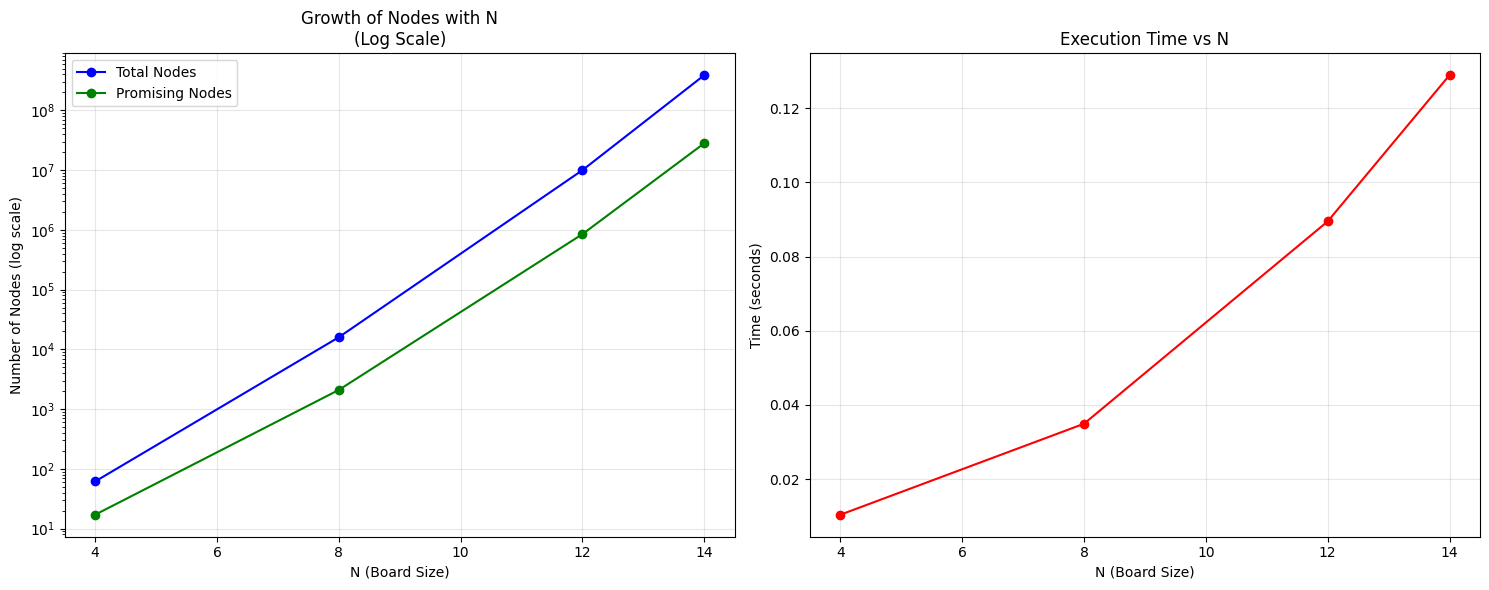

In [29]:
def analyze_complexity(n_values, trials_per_n=1000):
    """Analyze time complexity for different values of n"""
    total_nodes_avg = []
    promising_nodes_avg = []
    execution_times = []
    
    for n in n_values:
        start_time = time.time()
        trial_totals = []
        trial_promising = []
        
        for _ in range(trials_per_n):
            total, promising = monte_carlo_estimate(n)
            trial_totals.append(total)
            trial_promising.append(promising)
        
        exec_time = time.time() - start_time
        total_nodes_avg.append(mean(trial_totals))
        promising_nodes_avg.append(mean(trial_promising))
        execution_times.append(exec_time)
        
        print(f"\nResults for n={n}:")
        print(f"Average Total Nodes: {mean(trial_totals):,.2f}")
        print(f"Average Promising Nodes: {mean(trial_promising):,.2f}")
        print(f"Execution Time: {exec_time:.4f} seconds")
    
    return total_nodes_avg, promising_nodes_avg, execution_times

def plot_complexity_analysis(n_values, total_nodes, promising_nodes, times):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Nodes vs N (log scale)
    ax1.plot(n_values, total_nodes, 'b-o', label='Total Nodes')
    ax1.plot(n_values, promising_nodes, 'g-o', label='Promising Nodes')
    ax1.set_yscale('log')
    ax1.set_title('Growth of Nodes with N\n(Log Scale)', fontsize=12)
    ax1.set_xlabel('N (Board Size)', fontsize=10)
    ax1.set_ylabel('Number of Nodes (log scale)', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: Execution Time vs N
    ax2.plot(n_values, times, 'r-o', label='Execution Time')
    ax2.set_title('Execution Time vs N', fontsize=12)
    ax2.set_xlabel('N (Board Size)', fontsize=10)
    ax2.set_ylabel('Time (seconds)', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    random.seed(123)
    n_values = [4, 8, 12, 14]  # Different board sizes
    
    print("Analyzing time complexity for N-Queens problem")
    print("=" * 60)
    
    total_nodes, promising_nodes, exec_times = analyze_complexity(n_values)
    plot_complexity_analysis(n_values, total_nodes, promising_nodes, exec_times)

if __name__ == "__main__":
    main()